In [0]:
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_dir = "/content/drive/My Drive/Others/data/"

In [0]:
ero_data = np.load(root_dir + "numRew_db3_ERO_ep500_r500k_b1k_rp01_19273.npy", allow_pickle=True)

In [0]:
per_data = np.load(root_dir + "numRew_db3_PER_ep500_r500k_b1k_rp01_9596.npy", allow_pickle=True)

In [0]:
uni_data = np.load(root_dir + "numRew_db3_Unif_ep500_r500k_b1k_rp01_10219.npy", allow_pickle=True)

In [0]:
per_data_db4 = np.load(root_dir + "numRew_db4_PER_ep500_r500k_b1k_rp01_1571.npy", allow_pickle=True)

In [0]:
import matplotlib.pyplot as plt


In [0]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

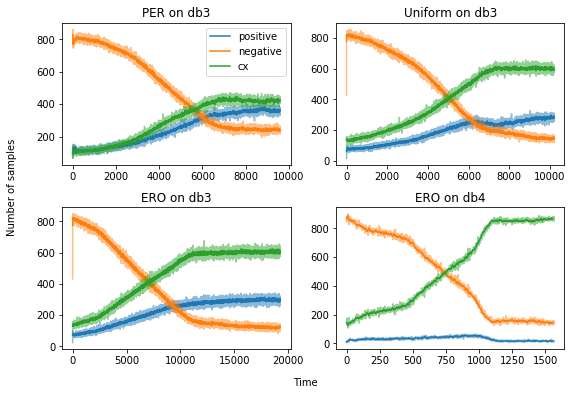

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
fig.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.04, 'Time', ha='center')
fig.text(0.04, 0.5, 'Number of samples', va='center', rotation='vertical')
mv_avg_n = 10
count = 0
colors = ['orange', 'green', 'blue']
l = ['positive', 'negative', 'cx']

for row in ax:
  for col in row:
    if count == 0:
      for i in range(0, per_data.shape[1]):
        out = col.plot(moving_average(per_data[:, i], mv_avg_n), label=l[i])
        col.plot(per_data[:, i], alpha=0.5, color=out[0].get_color())
        #print("Done")
      col.legend()
      col.set_title("PER on db3")

    if count == 1:
      for i in range(0, uni_data.shape[1]):
        out = col.plot(moving_average(uni_data[:, i], mv_avg_n))
        col.plot(uni_data[:, i], alpha=0.5, color=out[0].get_color())
      #col.plot(uni_data)
      col.set_title("Uniform on db3")
    
    if count == 2:
      for i in range(0, ero_data.shape[1]):
        out = col.plot(moving_average(ero_data[:, i], mv_avg_n))
        col.plot(ero_data[:, i], alpha=0.5, color=out[0].get_color())
      col.set_title("ERO on db3")
    
    if count == 3:
      for i in range(0, per_data_db4.shape[1]):
        out = col.plot(moving_average(per_data_db4[:, i], mv_avg_n))
        col.plot(per_data_db4[:, i], alpha=0.5, color=out[0].get_color())
      
      col.set_title("ERO on db4")
    count += 1

plt.savefig("plot.png")

In [60]:
ax[0][0].get

AttributeError: ignored